### Feature Engineering - Baseline.io 
    Goal: Determime Important Features for predicting the popularity of a song

## Table of Contents
- [Data Preprocessing ](#Data-Preprocessing)
    - [Data Dictionary ](#Data-Dictionary) 
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Modelling](#Modelling)
- [Conclusion](#Conclusion)




## Importing Libraries 

In [208]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import statsmodels.api as sm

from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression,Ridge, Lasso
from sklearn.cluster import KMeans 
from xgboost import XGBRegressor


from sklearn.feature_selection import SelectKBest, VarianceThreshold, f_regression
from sklearn import tree
from joblib import dump, load

from warnings import filterwarnings
filterwarnings("ignore")

In [58]:
import os 
fp = os.getcwd()

## Data Preprocessing 

In [59]:
#import data 
music_pop_df = pd.read_csv(fp+'/song_data.csv')
music_pop_df.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


## Data Dictionary 

| Feature Name | Description | Data Type | Notes / Range |
|------------|------------|----------|---------------|
| song_duration_ms | Duration of the track in milliseconds | Integer | 120,000–1,800,000 |
| tempo | Estimated tempo of the track in beats per minute (BPM) | Float | 0–250 BPM |
| song_popularity | Popularity score of the song based on platform metrics | Integer | 0–100 |
| loudness | Overall loudness of the track in decibels (dB) | Float |  −40 and 2 |
| key | Musical key the track is in | Integer | 0–11 (C=0, C♯=1, …, B=11) |
| audio_mode | Modality of the track (major or minor) | Integer | 1 = Major, 0 = Minor |
| time_signature | Estimated time signature | Integer | 0 - 5 |
| acousticness | Confidence measure of whether the track is acoustic | Float | 0.0–1.0 |
| audio_valence | Musical positiveness conveyed by the track | Float | 0.0 (sad) – 1.0 (happy) |
| instrumentalness | Likelihood the track contains no vocals | Float | 0.0–1.0 |
| energy | Perceptual measure of intensity and activity | Float | 0.0–1.0|
| danceability | Suitability of the track for dancing | Float | 0.0–1.0 |
| liveness | Probability the track was recorded live | Float | 0.0–1.0 |
| speechiness | Presence of spoken words in the track | Float | 0.0–1.0 |
| song_name | Name of Song | String |  |

In [60]:
music_pop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  int64  
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  int64  
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  int64  
 14  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.2+ MB


In [61]:
#checking if there are any null entries 
music_pop_df.isnull().sum()

song_name           0
song_popularity     0
song_duration_ms    0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
audio_mode          0
speechiness         0
tempo               0
time_signature      0
audio_valence       0
dtype: int64

In [62]:
#number of duplicates in original data 
print(f'There are {music_pop_df.duplicated().sum()} duplicates in the data')

There are 3909 duplicates in the data


In [63]:
#sorting duplicates
music_pop_df[music_pop_df.duplicated(subset=['song_name','song_popularity'])].sort_values(by= 'song_name')  

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
13859,'Till I Collapse,85,297893,0.0757,0.572,0.853,0.000000,1,0.0798,-3.203,1,0.2170,171.297,4,0.102
17260,'Till I Collapse,85,297893,0.0757,0.572,0.853,0.000000,1,0.0798,-3.203,1,0.2170,171.297,4,0.102
2792,(Don't Fear) The Reaper,76,308120,0.0029,0.333,0.927,0.000211,9,0.2970,-8.550,0,0.0733,141.470,4,0.382
8529,(What A) Wonderful World,71,125440,0.6270,0.691,0.507,0.000000,11,0.4570,-10.230,1,0.0343,128.518,4,0.885
8216,(What A) Wonderful World,71,125440,0.6270,0.691,0.507,0.000000,11,0.4570,-10.230,1,0.0343,128.518,4,0.885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4183,¿Quieres Ser Mi Amante?,63,249666,0.7920,0.409,0.574,0.000001,5,0.0915,-8.112,0,0.0415,151.979,4,0.550
17766,¿Qué Tiene?,75,177272,0.6290,0.708,0.534,0.004620,10,0.0940,-7.623,0,0.1590,87.907,4,0.704
17801,¿Qué Tiene?,75,177272,0.6290,0.708,0.534,0.004620,10,0.0940,-7.623,0,0.1590,87.907,4,0.704
15448,لا جوزاديرا (feat. Marc Anthony & Gente de Zon...,33,207041,0.1140,0.640,0.965,0.000000,9,0.0961,-3.424,0,0.0593,95.063,4,0.885


In [64]:
music_pop_df.describe().T

,count,mean,std,min,25%,50%,75%,max
song_popularity,18835.0,52.991877,21.905654,0.000000,40.0000,56.000000,69.00000,100.000
song_duration_ms,18835.0,218211.587576,59887.540566,12000.000000,184339.5000,211306.000000,242844.00000,1799346.000
acousticness,18835.0,0.258539,0.288719,0.000001,0.0241,0.132000,0.42400,0.996
danceability,18835.0,0.633348,0.156723,0.000000,0.5330,0.645000,0.74800,0.987
energy,18835.0,0.644995,0.214101,0.001070,0.5100,0.674000,0.81500,0.999
instrumentalness,18835.0,0.078008,0.221591,0.000000,0.0000,0.000011,0.00257,0.997
key,18835.0,5.289196,3.614595,0.000000,2.0000,5.000000,8.00000,11.000
liveness,18835.0,0.179650,0.143984,0.010900,0.0929,0.122000,0.22100,0.986
loudness,18835.0,-7.447435,3.827831,-38.768000,-9.0440,-6.555000,-4.90800,1.585
audio_mode,18835.0,0.628139,0.483314,0.000000,0.0000,1.000000,1.00000,1.000


In [65]:
#drop duplicates
music_pop_df = music_pop_df.drop_duplicates()

In [66]:
#check new total count for data after dropping duplicates
music_pop_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14926 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         14926 non-null  object 
 1   song_popularity   14926 non-null  int64  
 2   song_duration_ms  14926 non-null  int64  
 3   acousticness      14926 non-null  float64
 4   danceability      14926 non-null  float64
 5   energy            14926 non-null  float64
 6   instrumentalness  14926 non-null  float64
 7   key               14926 non-null  int64  
 8   liveness          14926 non-null  float64
 9   loudness          14926 non-null  float64
 10  audio_mode        14926 non-null  int64  
 11  speechiness       14926 non-null  float64
 12  tempo             14926 non-null  float64
 13  time_signature    14926 non-null  int64  
 14  audio_valence     14926 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 1.8+ MB


## Exploratory Data Analysis

In [67]:
#count for music popularity feature
music_pop_df['song_popularity'].value_counts()

song_popularity
52     355
58     347
55     346
53     325
51     324
      ... 
96       5
97       4
98       4
99       1
100      1
Name: count, Length: 101, dtype: int64

In [68]:
num_cols = music_pop_df.columns[music_pop_df.dtypes != 'object']

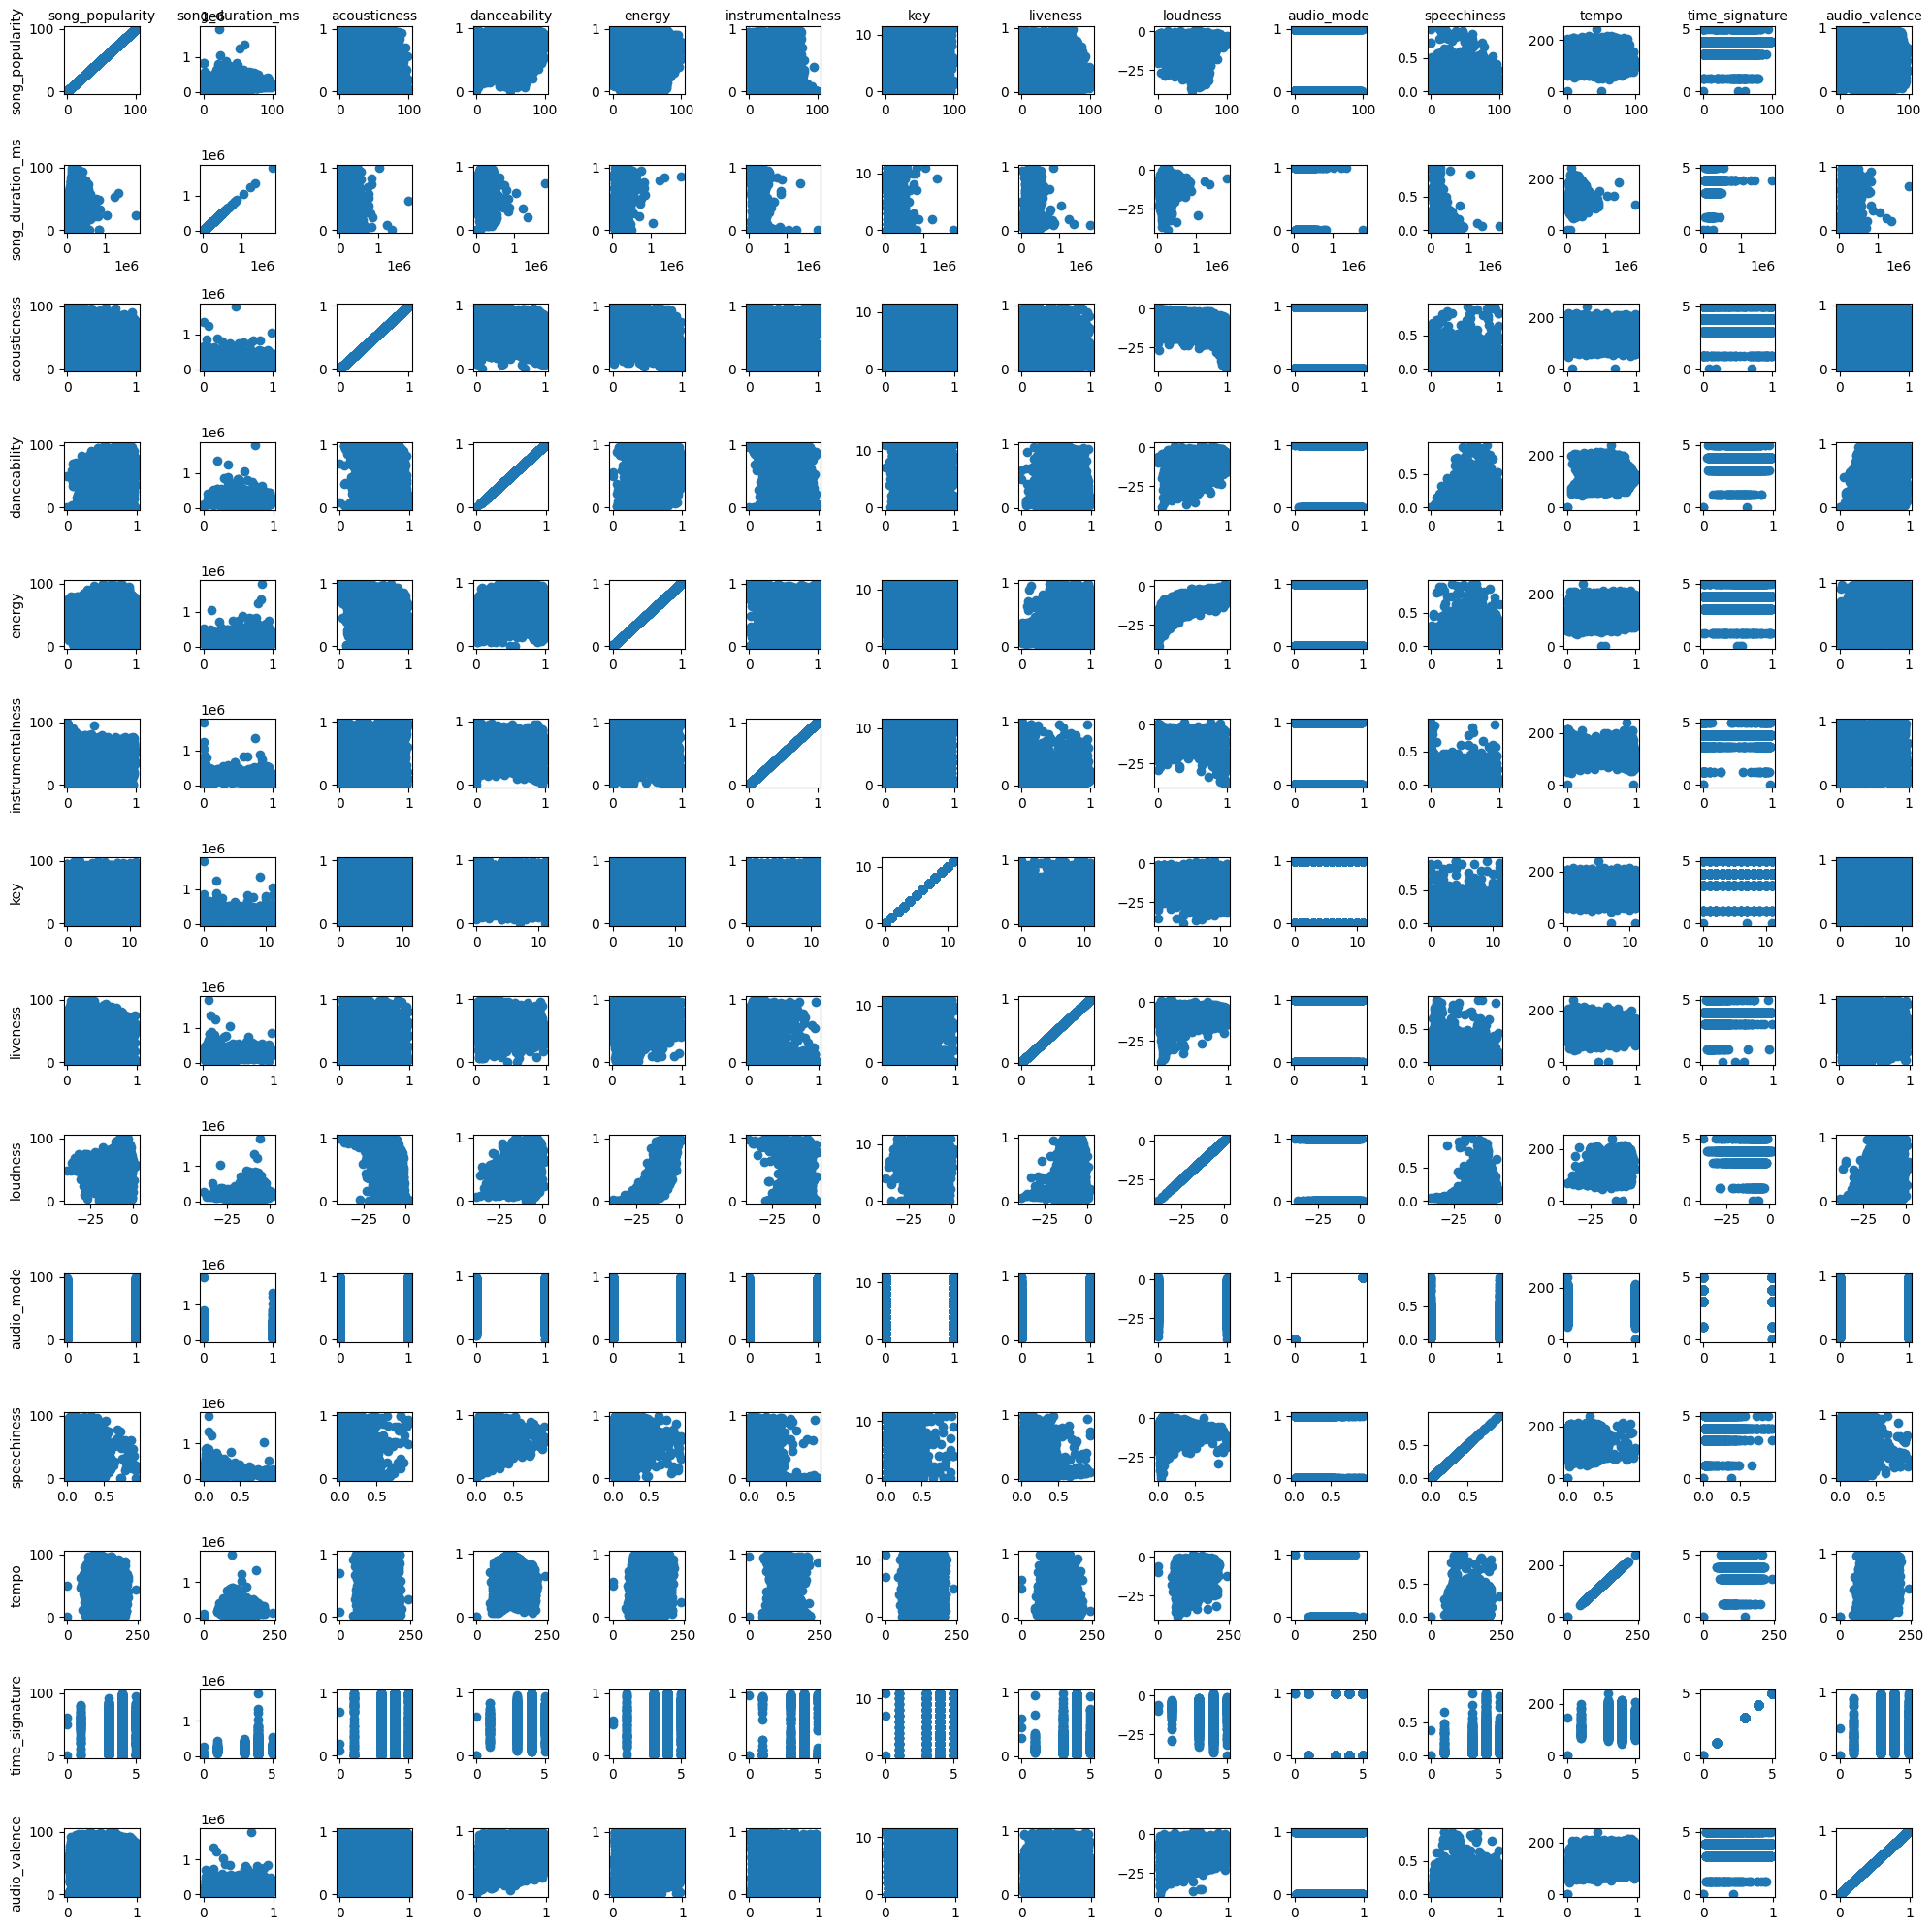

In [69]:
fig, ax = plt.subplots(len(num_cols), len(num_cols),figsize=(20, 20))

for i, col in enumerate(num_cols):
    for j in range(len(num_cols)):
        ax[i][j].scatter(music_pop_df[col], music_pop_df[num_cols[j]])
        #ax[i][j].set_title(col)
    ax[0][i].set_xlabel(col)
    ax[i][0].set_ylabel(num_cols[i])
    ax[0][i].xaxis.set_label_position('top')

plt.tight_layout()
plt.show()

From the matrix of plot with the relationships of all the features in the data no of the features have a strong positive or negative relationship with one another. 

In [70]:
music_pop_df[num_cols].corr()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
song_popularity,1.000000,-0.007766,-0.031658,0.056415,-0.016468,-0.093032,-0.003878,-0.038553,0.052114,0.008824,-0.001971,-0.029560,0.023307,-0.043963
song_duration_ms,-0.007766,1.000000,-0.113314,-0.089338,0.096375,-0.024850,-0.006749,0.020757,0.027837,-0.028056,-0.079438,0.013608,0.004080,-0.069763
acousticness,-0.031658,-0.113314,1.000000,-0.171859,-0.679235,0.179259,-0.000632,-0.085242,-0.569681,0.059443,-0.085435,-0.144736,-0.151180,-0.126915
danceability,0.056415,-0.089338,-0.171859,1.000000,0.053657,-0.124926,0.007599,-0.094373,0.173495,-0.099039,0.200715,-0.127313,0.136211,0.350012
energy,-0.016468,0.096375,-0.679235,0.053657,1.000000,-0.221755,0.014653,0.175979,0.765706,-0.049040,0.072138,0.182517,0.143516,0.315023
instrumentalness,-0.093032,-0.024850,0.179259,-0.124926,-0.221755,1.000000,-0.008496,-0.039821,-0.398912,-0.018852,-0.076705,-0.041032,-0.068656,-0.197783
key,-0.003878,-0.006749,-0.000632,0.007599,0.014653,-0.008496,1.000000,-0.003254,0.008002,-0.174955,0.028565,-0.005033,-0.008750,0.023626
liveness,-0.038553,0.020757,-0.085242,-0.094373,0.175979,-0.039821,-0.003254,1.000000,0.111716,-0.001729,0.094229,0.025681,0.014792,0.016572
loudness,0.052114,0.027837,-0.569681,0.173495,0.765706,-0.398912,0.008002,0.111716,1.000000,-0.055793,0.078418,0.140217,0.112596,0.209803
audio_mode,0.008824,-0.028056,0.059443,-0.099039,-0.049040,-0.018852,-0.174955,-0.001729,-0.055793,1.000000,-0.110686,0.021863,-0.020789,0.002254


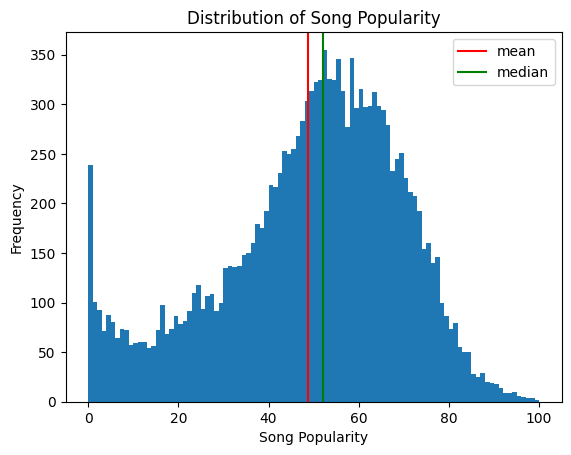

In [71]:
x = music_pop_df['song_popularity']
x_mean = np.mean(x)
x_median = np.median(x)

plt.figure()
plt.hist(x, bins=100)
plt.xlabel('Song Popularity')
plt.axvline(x_mean, label='mean', color='red')
plt.axvline(x_median, label='median', color='green')
plt.ylabel('Frequency')
plt.title('Distribution of Song Popularity')
plt.legend()
plt.show()

The distribution of song popularity looks normally distributed excluding the large peak at zero. This could be due to outliers in the data or songs that were not popular. Therefore on average, any song with a song_popularity over 50 (**>50**) will be considered a popular song. 

Note that this can be converted into a classification problem by assigning any song with a song_popularity greater than 50 will be 1 and any song_popularity less than 50 will be 0. As we have been asked to evalute the final model using mean squared error, I will continue with this project as a regression problem. 

In [72]:
#checking the variance without scaling 
music_pop_df[num_cols].var().sort_values(ascending=False)

song_duration_ms    3.886376e+09
tempo               8.435913e+02
song_popularity     4.153226e+02
loudness            1.614971e+01
key                 1.290689e+01
audio_mode          2.326134e-01
time_signature      1.003004e-01
acousticness        8.887377e-02
audio_valence       6.138413e-02
instrumentalness    5.781657e-02
energy              4.917581e-02
danceability        2.498951e-02
liveness            2.105326e-02
speechiness         1.072179e-02
dtype: float64

In [73]:
#scaling the data before calculating the variance
scaler = MinMaxScaler()
scaled_data =scaler.fit_transform(music_pop_df[num_cols])

In [74]:
#variances of scaled data 
music_pop_df_scaled = pd.DataFrame(data=scaled_data, columns=num_cols)
music_pop_df_scaled.var().sort_values(ascending=False)

audio_mode          0.232613
key                 0.106669
acousticness        0.089589
audio_valence       0.063397
instrumentalness    0.058165
energy              0.049380
song_popularity     0.041532
danceability        0.025652
liveness            0.022142
tempo               0.014367
speechiness         0.012108
loudness            0.009918
time_signature      0.004012
song_duration_ms    0.001217
dtype: float64

From above, loudness, time_signature and song_duration_ms do not have much variability in their respective data, hence they should not be important in the data. Let's head on to the modelling and see if we can analyze more feature importance.

### Modelling

In [130]:
#splitting data to independent and target variable
X = music_pop_df[num_cols].drop(columns='song_popularity')
y = music_pop_df[['song_popularity']]

In [131]:
#split data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=32)

In [132]:
print(f'X_train shape:{X_train.shape}\ny_train shape:{y_train.shape}\nX_test shape:{X_test.shape}\ny_train shape:{y_test.shape}')

X_train shape:(11194, 13)
y_train shape:(11194, 1)
X_test shape:(3732, 13)
y_train shape:(3732, 1)


In [133]:
#test run using MinMaxScaler, scaling is done due to the differences in the magnitude of the data in each observation. 

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [134]:
#use a basic linear regression using all features
lr_model = LinearRegression()
lr_model.fit(X_train_scaled,y_train)

lr_model_train_pred = lr_model.predict(X_train_scaled)
lr_model_test_pred = lr_model.predict(X_test_scaled)

print(f'Linear Regression Train MSE:{np.round(mean_squared_error(y_train, lr_model_train_pred),4)}')
print(f'Linear Regression Test MSE:{np.round(mean_squared_error(y_test, lr_model_test_pred),4)}')

Linear Regression Train MSE:406.5931
Linear Regression Test MSE:403.43


In [135]:
#using K_best to see important features 
k_best = SelectKBest(f_regression)
k_best.fit(X_train_scaled,y_train)

,"score_func score_func: callable, default=f_classifFunction taking two arrays X and y, and returning a pair of arrays(scores, pvalues) or a single array with scores.Default is f_classif (see below ""See Also""). The default function onlyworks with classification tasks... versionadded:: 0.18",<function f_r...t 0x12fdee020>
,"k k: int or ""all"", default=10Number of top features to select.The ""all"" option bypasses selection, for use in a parameter search.",10


In [136]:
k_best_index = k_best.get_support()
k_best_index

array([False,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True])

In [98]:
np.round(k_best.scores_,4)

array([1.40000e-01, 1.96878e+01, 3.04659e+01, 3.86200e-01, 9.32214e+01,
       3.36440e+00, 1.33291e+01, 3.95129e+01, 1.69000e-02, 2.66200e-01,
       1.47621e+01, 7.21340e+00, 2.26331e+01])

In [137]:
# the important features accordning to Kbest
k_best_cols = X.columns[k_best_index].tolist()
k_best_cols

['acousticness',
 'danceability',
 'energy',
 'instrumentalness',
 'key',
 'liveness',
 'loudness',
 'tempo',
 'time_signature',
 'audio_valence']

Spechineess, Song duration and Audio mode have been dropped using KBest. 

#### Running a Linear Regression with the reduced features from KBest to check if the MSE reduces. 

In [138]:
scaler = MinMaxScaler()
scaler.fit(X_train[k_best_cols])

X_train_scaled_2 = scaler.transform(X_train[k_best_cols])
X_test_scaled_2 = scaler.transform(X_test[k_best_cols])

In [142]:
X_train_scaled_2.shape

(11194, 10)

In [143]:
X_test_scaled_2.shape

(3732, 10)

In [141]:
#fitting the linear regression again to see if MSE improves
lr_model = LinearRegression()
lr_model.fit(X_train_scaled_2,y_train)

lr_model_train_pred = lr_model.predict(X_train_scaled_2)
lr_model_test_pred = lr_model.predict(X_test_scaled_2)

print(f'Linear Regression Train MSE:{np.round(mean_squared_error(y_train, lr_model_train_pred),4)}')
print(f'Linear Regression Test MSE:{np.round(mean_squared_error(y_test, lr_model_test_pred),4)}')

Linear Regression Train MSE:406.7356
Linear Regression Test MSE:403.6892


In [148]:
#create a pipeline using MinMaxScaler for scaling, KBest with K=10 for feature engineering and Linear regression for modelling.  
music_pop_pipe = Pipeline([
    ("scaler", MinMaxScaler()),
    ("kbest", SelectKBest(score_func=f_regression, k=10)),
    ("model", LinearRegression())
])

music_pop_pipe.fit(X_train,y_train)

y_pred_test = music_pop_pipe.predict(X_test)
y_pred_train = music_pop_pipe.predict(X_train)

print(f'Using pipeline, Train MSE:{np.round(mean_squared_error(y_train, y_pred_train),4)}')
print(f'Using pipeline, Test MSE:{np.round(mean_squared_error(y_test, y_pred_test ),4)}')


Using pipeline, Train MSE:406.7356
Using pipeline, Test MSE:403.6892


Train and Test MSEs using pipelines correspond to computing manaully. We will now use a grid search and random search to find the optimal modelling procedure.

In [213]:
#creating models for Grid Search 
param_grid = [
    # Linear Regression
    {
        "scaler": [MinMaxScaler(), StandardScaler()],
        "kbest__k": np.arange(1, 15),
        "model": [LinearRegression()]
    },

    # Ridge Regression 
    {
        "scaler": [MinMaxScaler(), StandardScaler()],
        "kbest__k": np.arange(1, 15),
        "model": [Ridge()],
        "model__alpha": np.logspace(-3, 3, 10)
    },

    # Lasso Regression
    {
        "scaler": [MinMaxScaler(), StandardScaler()],
        "kbest__k": np.arange(1, 15),
        "model": [Lasso()],
        "model__alpha": np.logspace(-3, 3, 10)
    },
    
    # Decision Tree 
    {
        "kbest__k": np.arange(1, 15),
        "model": [DecisionTreeRegressor()],
        "model__max_depth": np.arange(1, 50)
    },

]

In [214]:
grid = GridSearchCV(
    music_pop_pipe,
    param_grid,
    scoring="neg_mean_squared_error",
    cv=5,
    n_jobs=-1
)

grid.fit(X_train,y_train)

print(grid.best_estimator_)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('kbest',
                 SelectKBest(k=np.int64(4),
                             score_func=<function f_regression at 0x12fdee020>)),
                ('model', DecisionTreeRegressor(max_depth=np.int64(3)))])


In [215]:
grid.best_params_

{'kbest__k': np.int64(4),
 'model': DecisionTreeRegressor(),
 'model__max_depth': np.int64(3)}

In [216]:
final_features = grid.best_estimator_.named_steps['kbest'].get_support()
final_features 

array([False, False,  True, False,  True, False, False,  True, False,
       False, False, False,  True])

In [217]:
ff_names = X.columns[final_features]

In [218]:
best_neg_mse = grid.best_score_
best_mse = -best_neg_mse
print('Best MSE:', best_mse)

Best MSE: 405.70246448168444


Visually checking how the MSE was minimized. 

In [219]:
train_mse = []
test_mse = []


maximum_depth = np.arange(1,20,1)

for maxdepth in maximum_depth:
    dtr_model = DecisionTreeRegressor(max_depth=maxdepth)
    dtr_model.fit(X_train_scaled,y_train)
    y_pred_test = dtr_model.predict(X_test_scaled)
    y_pred_train = dtr_model.predict(X_train_scaled)
    train_mse.append(mean_squared_error(y_train,y_pred_train))
    test_mse.append(mean_squared_error(y_test,y_pred_test))



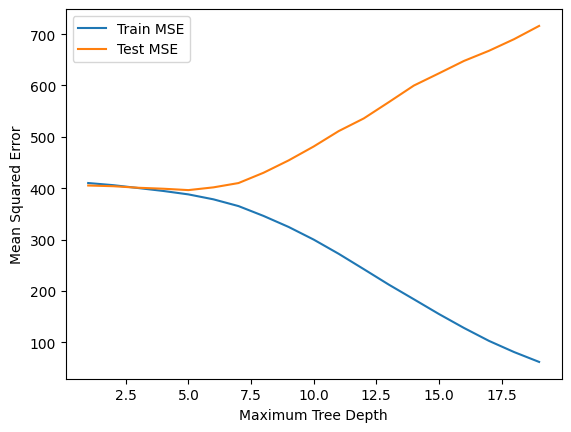

In [220]:
#plotting the maximum tree depth agains the training and testing MSE 
plt.plot(maximum_depth,train_mse,label='Train MSE')
plt.plot(maximum_depth,test_mse,label='Test MSE')
plt.ylabel('Mean Squared Error')
plt.xlabel('Maximum Tree Depth')
plt.legend()
plt.show()

From the above graph, we can see that using a maximum depth of 3 for the decision tree regression model yields a minimum MSE when comparing the Training and Testing MSE. 

In [221]:
#final pipeline
music_pop_pipe_final = Pipeline([
    ("scaler", MinMaxScaler()),
    ("kbest", SelectKBest(score_func=f_regression, k=4)),
    ("model", DecisionTreeRegressor(max_depth=3))
])
final_model = music_pop_pipe_final.fit(X_train,y_train)

In [222]:
scaler = MinMaxScaler()
scaler.fit(X_train[ff_names])

X_train_scaled_final = scaler.transform(X_train[ff_names])
X_test_scaled_final = scaler.transform(X_test[ff_names])


In [223]:
final_model = DecisionTreeRegressor(max_depth=3)
ff_dt_model = final_model.fit(X_train_scaled_final,y_train)

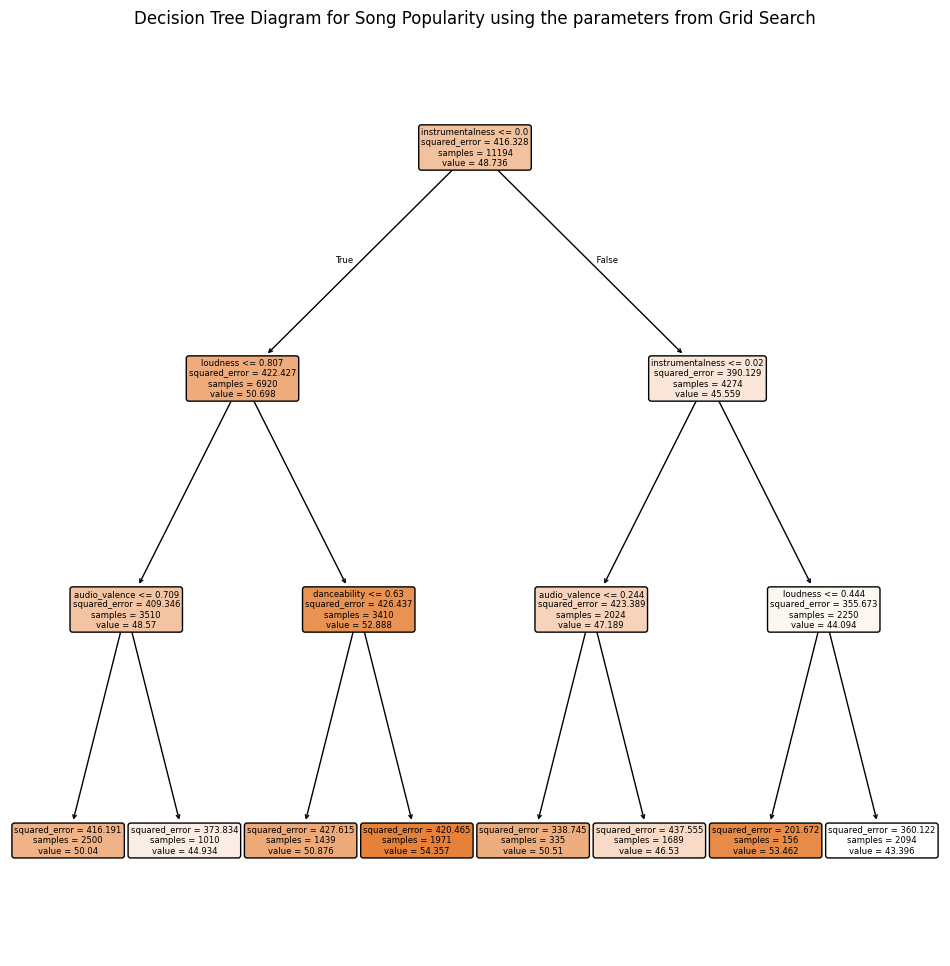

In [226]:
plt.figure(figsize=(12, 12))

tree.plot_tree(ff_dt_model,
feature_names= ff_names ,
filled=True,
rounded=True);

plt.title('Decision Tree Diagram for Song Popularity using the parameters from Grid Search')
plt.show()

In [227]:
#creating PKL file with pipeline
dump(music_pop_pipe_final, "music_pop_pipeline.pkl")

['music_pop_pipeline.pkl']

## Conclusion

For this project, I created a machine learning pipeline that scales the data using MinMaxScaler, selects four features using SelectKBest, and applies a Decision Tree Regressor with a maximum depth of 3 for prediction. The pipeline configuration was chosen using GridSearchCV, which evaluated multiple models and their respective hyperparameters and selected the best estimator by minimizing the mean squared error (MSE).

The grid search identified an optimal estimator with a mean squared error of **405.7** using 4 features, using all the features will yield and MSE of about **~403**, we can see that using these 4 features still yields a MSE close to the MSE using all the features. Since the primary objective of this project is to identify the most important features for predicting song popularity, the selected model—combined with SelectKBest—highlighted the following four features as most informative: **danceability**, **instrumentalness**, **loudness**, and **audio_valence**.

To tie the modeling approach back to the business problem, we begin with domain-driven expectations about how engineered audio features should relate to song popularity.

For example, we expect songs with high danceability to be more popular. Highly danceable tracks are more likely to be played in radio rotations, clubs, parties, and curated playlists, all of which increase exposure and listener engagement. As a result, danceability should have a positive relationship with song popularity.